<!---<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork20718188-2021-01-01"><img src= "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width=500></a>-->

<h2 align=center><font size=7> Project</font><h1>
<h2 align=center><font size=6> Regression with deep learning library keras</font><h1>

In this lab we will apply Keras library to build nural network for regression. The lab consists of four parts:
1. To build baseline model
2. Normalize the data
3. Increase the number of epochs
4. Increase the number of hidden layers

## Purpose:
After applying all four parts one will be able to understand impacts of Data Normalization, number of epochs and hidden layers on deep learning approach.

## ToDO
### A. Build a baseline model (5 marks)

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the **adam** optimizer and the **mean squared error**  as the loss function.



1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.

2. Train the model on the training data using **50 epochs**.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the **mean_squared_error** function from Scikit-learn.

4. Repeat steps 1 - 3, **50 times**, i.e., create a list of **50** mean squared errors.

5. Report the **mean and the standard deviation of the mean squared errors**.

Submit your Jupyter Notebook with your code and comments.


### B. Normalize the data (5 marks) 

Repeat Part A **but use a normalized version of the data**. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

**How does the mean of the mean squared errors compare to that from Step A?**


### C. Increate the number of epochs (5 marks)

Repeat Part B **but use 100 epochs this time for training**.

**How does the mean of the mean squared errors compare to that from Step B?**

### D. Increase the number of hidden layers (5 marks)

Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

**How does the mean of the mean squared errors compare to that from Step B?**

In [1]:
import numpy as np
import pandas as pd

### Downloding and Loading data

In [2]:
#!wget -O concrete_data.csv 'https://cocl.us/concrete_data'

plain_data = pd.read_csv('concrete_data.csv')

In [3]:
print(plain_data.isnull().sum())
plain_data.head()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Data seperation to predictors and terget

In [4]:
data_columns = plain_data.columns
X_plain = plain_data[data_columns[data_columns!='Strength']]
y_plain = plain_data[['Strength']]

In [5]:
from sklearn.model_selection._split import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense, Input
import statistics as stat

In [6]:
def sequential_model(h_layer=2,
                     h_node=[10,1],
                     input_shape=(8,),
                     activation=['relu'],
                     optimizer='adam',
                     loss='mean_squared_error',
                     metrics=['mse'] 
                    ):
    """
    Construct model.
        To construct model with hidden layers and output layer.

    Parameter:
    h_layer (int) : Number of layers including the output layer.
    h_node (list) : Number of nodes for each layer including the output layer.
    input_shape (tuple) : Input nodes for preamble layer.
    activation (list) : Activation for each layer with len h_layer-1
                        as output layer does not need any activation.
    optimizer (string) : Optimization method for optimizing weights.
    loss (string) : Loss function for calculating model accuracy.
    metrics (list or string) :Metrics to calculate the model perfomance
    """
    

    
    # Check the h_layer and activation function:
    if len(h_node)==h_layer:
        pass
    
    elif len(h_node)==h_layer-1:
        h_node.append(1)
    else:
        print(f'Mention the node number for each h_layer({h_layer}).',
              f'The mentioned node is {h_node}')
    
    if len(activation)==h_layer-1:
            pass
    else:
        print(f'Mention the activation method for each h_layer.',
              f'Given h_layer({h_layer}) and activation methodes {activation}.')
        
    model=Sequential()
    model.add(Input(shape=input_shape))
    
    for h_lye in range(h_layer-1):
        model.add(Dense(h_node[h_lye],
                        activation=activation[0]))
        
    model.add(Dense(h_node[-1]))
    
    model.compile(optimizer=optimizer, 
                  loss=loss,
                   metrics=metrics)
    
    return model


def unique_metrics(errors, metrics):
    """For combining the error and metrics method together."""
    
    if isinstance(errors, list):
        pass
    else:
        err = errors
        errors = []
        errors.append(err)
    
    if isinstance(metrics, list):
        pass    
    else:
        metr = metrics
        metrics = []
        metrics.append(metr)
            
    errors_dict = {'mean_square_error':'mse'} #s
    metrics_dict = {'mean_square_error': 'mse',
                    'accuracy':'acc'}
    
    errors_key_set = set(errors_dict.keys())#s
    metric_key_set = set(metrics_dict.keys())#s
    metric_keys = errors_key_set.union(metric_key_set)

    for key in metric_keys:       
        if key in metrics:
            metrics.remove(key)
            metrics.append(metrics_dict[key])
        if key in errors:
            errors.remove(key)
            errors.append(errors_dict[key])
            
    metrics = list(set(errors + metrics))
            
    return metrics, errors
               
    
    
def base_model(X, y,
               h_layer,
               h_node,
               input_shape,
               epochs=50,
               activation=['relu'],
               model_repeat=50,
               loss='mean_squared_error',
               optimizer='adam',
               metrics=['mse'],
               errors='mean_square_error',
               ):#, func=sequential_model):
    """
    Construct base model.
        To construct base model with hidden layers and output layer.
        The base allows apply the model on the dataset (predictor and target)
        and the repeatation of the model on the same dataset.

    Parameter:
    X (dataset, numpy array) : Predictors data.
    y (dataet, numpy array) : Target data.
    h_layer (int) : Number of layers including the output layer.
    h_node (list) : Number of nodes for each layer including the output layer.
    input_shape (tuple) : Input nodes for preamble layer.
    activation (list) : Activation for each layer with len h_layer-1
                        as output layer does not need any activation.
    model_repeat (int) : Number of the repeatation of the model.
    optimizer (string) : Optimization method for optimizing weights.
    loss (string) : Loss function for calculating model accuracy.
    metrics (list of string or string) :Metrics to calculate the model perfomance.
    errors (list of string, string) : The errors collected at each repeataion of 
                                      model.
    """
    
    if isinstance(X, tuple) and isinstance(y, tuple):
        try:
            X_train, X_test, y_train, y_test = X, y
        except TypeError or ValueError:
            raise('Please provide X_train and X_test as well as y_train, y_test')
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
    
    metrics, errors = unique_metrics(errors, metrics)
    print(metrics, errors)
    out_ens = []
    
    model = sequential_model(h_layer,
                             h_node,
                             input_shape,
                             activation=activation, 
                             optimizer=optimizer,
                             loss=loss, 
                             metrics=metrics)
    
    for rep_no in range(model_repeat):
        out = model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=epochs,
                  verbose=0)
        out_ens.append(out)
        
    return model, out_ens, errors, metrics


def calculate_model_effi(out_ens, errors, metrics):
    """To extract the errors and metrics from model history."""
    # for collecting the errors for repeat evaluation, 
    # as well as mean and standard deviation for error emsemble
    errors_dict = dict()
    errors_dict['errors_std'] = None
    errors_dict['errors_mean'] = None
    
    metrics_dict = dict()
    
    for err in errors:
        errors_dict[err] = []

    for met in metrics:
        metrics_dict[met] = []
        
    for out in out_ens:
        for err in errors:
            val_key = 'val_' + err
            last_err_val = out.history[val_key][-1]
            errors_dict[err].append(last_err_val)
            
        for met in metrics:
            val_key = 'val_' + met
            last_met_val = out.history[val_key][-1]
            metrics_dict[met].append(last_met_val)
            
    for key in errors_dict.keys():
        if key in ['errors_std', 'errors_mean']:
            continue
        err_ens = errors_dict[key]
        errors_dict['errors_std'] = stat.stdev(err_ens)
        errors_dict['errors_mean'] = stat.mean(err_ens)
     
    return errors_dict, metrics_dict
    

## Part-A

In [7]:
h_layer = 2
h_node = [10,1]
activation = ['relu']
input_shape = (8,)
epochs = 50
model_repeat = 50
errors = ['mse']
metrics = ['mse']
model_A, outs_A, errors_A, metrics_A = base_model(X_plain,y_plain,
                                                   h_layer=h_layer,
                                                   h_node=h_node,
                                                   input_shape=input_shape,
                                                   activation=activation,
                                                   epochs=epochs,
                                                   model_repeat=model_repeat,
                                                   metrics=metrics,
                                                   errors=errors)


['mse'] ['mse']


In [8]:
errors_dict, metrics_dict = calculate_model_effi(out_ens=outs_A, 
                     errors=errors_A, 
                     metrics=metrics_A)

mean = errors_dict.get('errors_mean')
std = errors_dict.get('errors_std')
mse = errors_dict.get('mse')


In [9]:
mse_max = max(mse)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


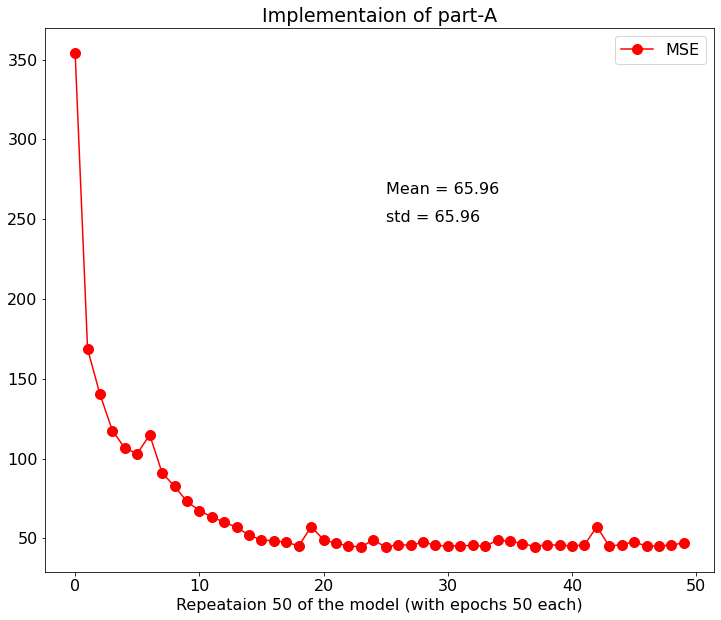

In [10]:
import matplotlib.pyplot as plt
import matplotlib as m


font = {'family':'normal',
        'weight': 'normal',
        'size':16}
plt.rc('font',**font)

plt.figure(figsize=(12,10))

plt.plot(np.arange(model_repeat), mse, 'ro', ls='-', 
         label='MSE', ms=10)
#plt.plot(np.arange(model_repeat), acc, 'bo', ls='-',
#         label='Accuracy')

plt.text(x=model_repeat/2.0, y= mse_max-mse_max*0.25, s=f'Mean = {np.round(mean,2)}')
plt.text(x=model_repeat/2.0, y= mse_max-mse_max*0.30, s=f'std = {np.round(mean,2)}')

plt.xlabel(f'Repeataion {model_repeat} of the model (with epochs {epochs} each)')
plt.title('Implementaion of part-A')
plt.legend()
plt.show()

## Part-B

In [11]:
from sklearn.preprocessing import StandardScaler


X_norm = StandardScaler().fit_transform(X_plain)
y_norm = StandardScaler().fit_transform(y_plain)

In [12]:
h_layer = 2
h_node = [10,1]
activation = ['relu']
input_shape = (8,)
epochs = 50
model_repeat = 50
errors = ['mse']
metrics = ['mse']
Model_B, outs_B, errors_B, metrics_B = base_model(X_norm,y_norm,
                                                   h_layer=h_layer,
                                                   h_node=h_node,
                                                   input_shape=input_shape,
                                                   activation=activation,
                                                   epochs=epochs,
                                                   model_repeat=model_repeat,
                                                   metrics=metrics)

['mse'] ['mse']


In [13]:
errors_dict, metrics_dict = calculate_model_effi(out_ens=outs_B, 
                     errors=errors_B, 
                     metrics=metrics_B)

mean = errors_dict.get('errors_mean')
std = errors_dict.get('errors_std')
mse = errors_dict.get('mse')


In [14]:
mse_max = max(mse)

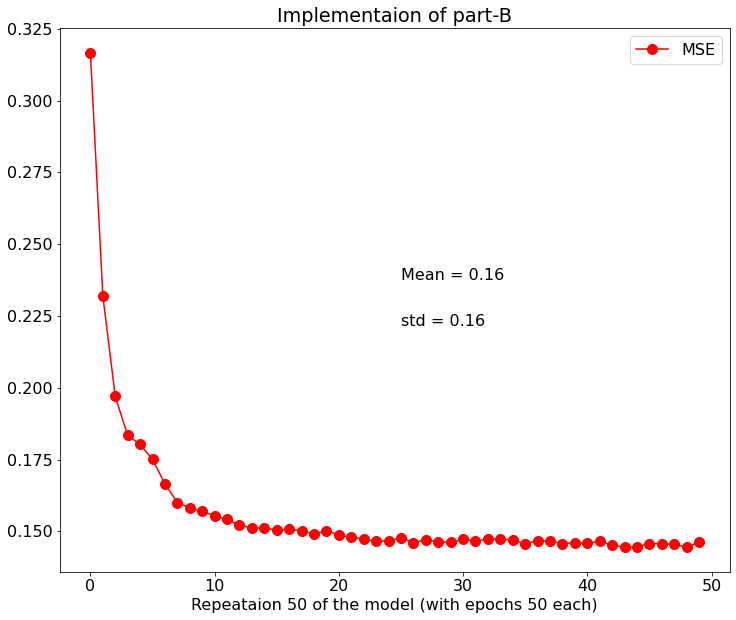

In [15]:
plt.figure(figsize=(12,10))

plt.plot(np.arange(model_repeat), mse, 'ro', ls='-', 
         label='MSE', ms=10)
#plt.plot(np.arange(model_repeat), acc, 'bo', ls='-',
#         label='Accuracy')

plt.text(x=model_repeat/2.0, y= mse_max-mse_max*0.25, s=f'Mean = {np.round(mean,2)}')
plt.text(x=model_repeat/2.0, y= mse_max-mse_max*0.30, s=f'std = {np.round(mean,2)}')

plt.xlabel(f'Repeataion {model_repeat} of the model (with epochs {epochs} each)')
plt.title('Implementaion of part-B')
plt.legend()
plt.show()

## Part-C

In [16]:
h_layer = 2
h_node = [10,1]
activation = ['relu']
input_shape = (8,)
epochs = 100
model_repeat = 50
errors = ['mse']
metrics = ['mse']
Model_C, outs_C, errors_C, metrics_C = base_model(X_norm,y_norm,
                                                   h_layer=h_layer,
                                                   h_node=h_node,
                                                   input_shape=input_shape,
                                                   activation=activation,
                                                   epochs=epochs,
                                                   model_repeat=model_repeat,
                                                   metrics=metrics,
                                                   errors=errors)

['mse'] ['mse']


In [17]:
errors_dict, metrics_dict = calculate_model_effi(out_ens=outs_C, 
                     errors=errors_C, 
                     metrics=metrics_C)

mean = errors_dict.get('errors_mean')
std = errors_dict.get('errors_std')
mse = errors_dict.get('mse')


In [18]:
mse_max = max(mse)

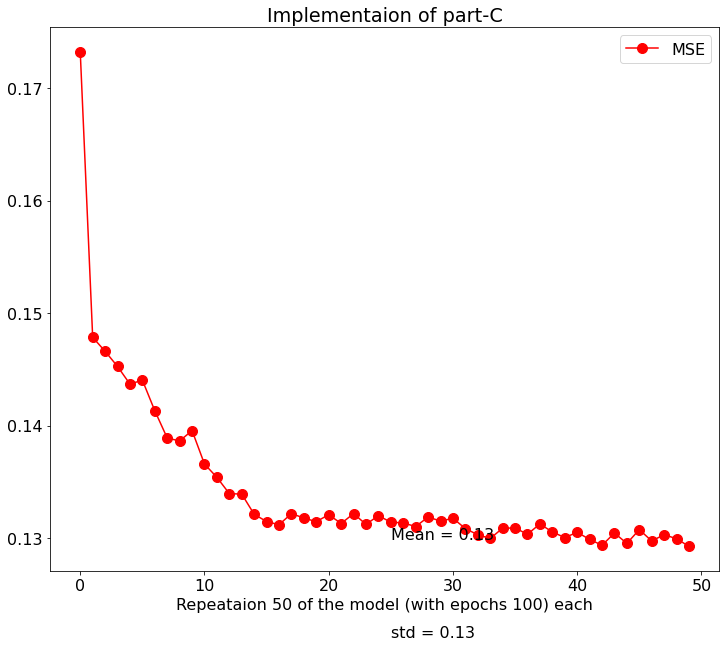

In [19]:
plt.figure(figsize=(12,10))

plt.plot(np.arange(model_repeat), mse, 'ro', ls='-', 
         label='MSE', ms=10)
#plt.plot(np.arange(model_repeat), acc, 'bo', ls='-',
 #        label='Accuracy')

plt.text(x=model_repeat/2.0, y= mse_max-mse_max*0.25, s=f'Mean = {np.round(mean,2)}')
plt.text(x=model_repeat/2.0, y= mse_max-mse_max*0.30, s=f'std = {np.round(mean,2)}')

plt.xlabel(f'Repeataion {model_repeat} of the model (with epochs {epochs}) each')
plt.title('Implementaion of part-C')
plt.legend()
plt.show()

## Part-D

In [20]:
h_layer = 4
h_node = [10,10,10,1]
activation = ['relu','relu', 'relu']
input_shape = (8,)
epochs = 100
model_repeat = 50
errors = ['mse']
metrics = ['mse']
Model_D, outs_D, errors_D, metrics_D = base_model(X_norm,y_norm,
                                                   h_layer=h_layer,
                                                   h_node=h_node,
                                                   input_shape=input_shape,
                                                   activation=activation,
                                                   epochs=epochs,
                                                   model_repeat=model_repeat,
                                                   metrics=metrics,
                                                   errors=errors)

['mse'] ['mse']


In [21]:
errors_dict, metrics_dict = calculate_model_effi(out_ens=outs_D, 
                     errors=errors_D, 
                     metrics=metrics_D)

mean = errors_dict.get('errors_mean')
std = errors_dict.get('errors_std')
mse = errors_dict.get('mse')


In [22]:
mse_max = max(mse)

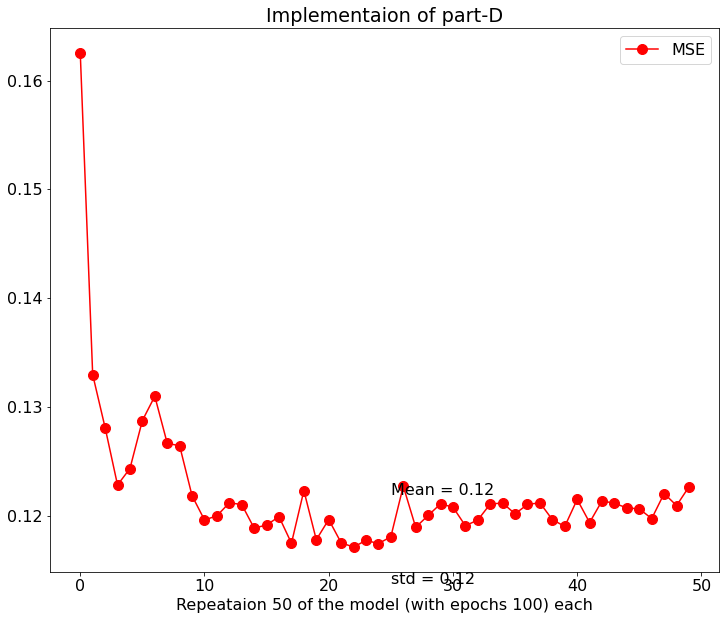

In [23]:
plt.figure(figsize=(12,10))

plt.plot(np.arange(model_repeat), mse, 'ro', ls='-', 
         label='MSE', ms=10)
#plt.plot(np.arange(model_repeat), acc, 'bo', ls='-',
 #        label='Accuracy')

plt.text(x=model_repeat/2.0, y= mse_max-mse_max*0.25, s=f'Mean = {np.round(mean,2)}')
plt.text(x=model_repeat/2.0, y= mse_max-mse_max*0.30, s=f'std = {np.round(mean,2)}')

plt.xlabel(f'Repeataion {model_repeat} of the model (with epochs {epochs}) each')
plt.title('Implementaion of part-D')
plt.legend()
plt.show()

## Comments:

1. Comparing the plots for part-A and part-B, we can speculate that normalization of features is preferable for optimization of weights.

2. Other two plots indicate that after certain accuracy the model can not optimized further even with increasing the layers and training interations. After a threshold mse the model oscilate around a accuracy value. With the diferent and lower learning parameter **$\alpha$** might help in this stage.

3. From my obsevation, the plots or mse values give different pattern or values for different attempts with train test spliting of dataset.